In [1]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
import pandas as pd
import ast
import os
from preprocessor import *

In [2]:
df = pd.read_csv('datasets/croppedHelen65.csv')

In [3]:
df.head()

,images,landmarks
0,2547802012_1.jpg,"[[66, 172], [75, 204], [88, 237], [108, 266], ..."
1,2547808775_1.jpg,"[[74, 184], [75, 218], [83, 252], [100, 281], ..."
2,2552816820_2.jpg,"[[70, 138], [72, 173], [81, 208], [97, 240], [..."
3,2550746669_1.jpg,"[[71, 183], [77, 216], [85, 249], [91, 281], [..."
4,2548725859_2.jpg,"[[74, 189], [82, 221], [91, 253], [106, 284], ..."


Show image with landmarks

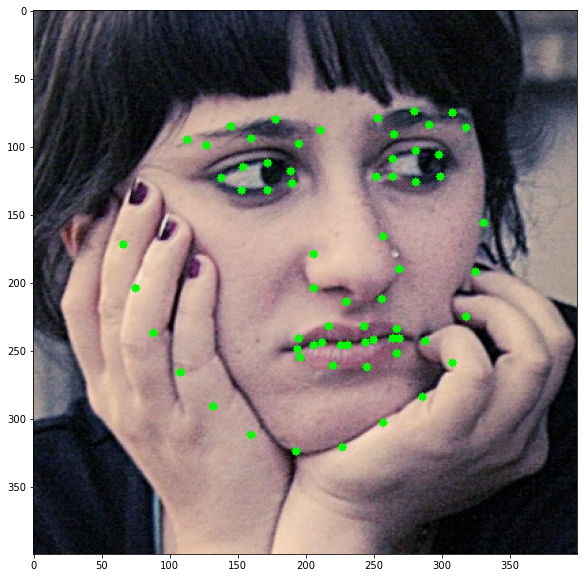

In [11]:
imgname = '2547802012_1.jpg'
landmarks= ast.literal_eval(df.loc[df['images'] == imgname].iloc[0]['landmarks'])
img = cv2.imread('datasets/croppedHelen/'+imgname)
for i in range(0,len(landmarks)):
  cv2.circle(img, (landmarks[i][0],landmarks[i][1]), 3, (0, 255, 0), -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show image with matplotlib and increase figure size
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [5]:
landmarkslist = df['landmarks'].values.tolist()
landmarks_dataset = np.array([ast.literal_eval(x) for x in landmarkslist])
mean_landmark = landmarks_dataset.mean(axis=0)

In [ ]:
candidate_shapes = aligned_landmarks

In [ ]:
x_bar = candidate_shapes.mean(axis=0)

In [ ]:
rng = np.random.default_rng()
sampled_shapes =rng.choice(candidate_shapes, 15, replace=False)

Trying to align all images, not working well

In [ ]:
#For each face in the dataset, align its landmarks with respect to the mean shape using Procrustes analysis
aligned_landmarks = np.zeros_like(landmarks_dataset)
transformations = []

for i in range(len(landmarks_dataset)):
    d,z,tfrom = procrustes_analysis(mean_landmark, landmarks_dataset[i])
    aligned_landmarks[i] = z
    transformations.append(tfrom)

(400, 400, 3)


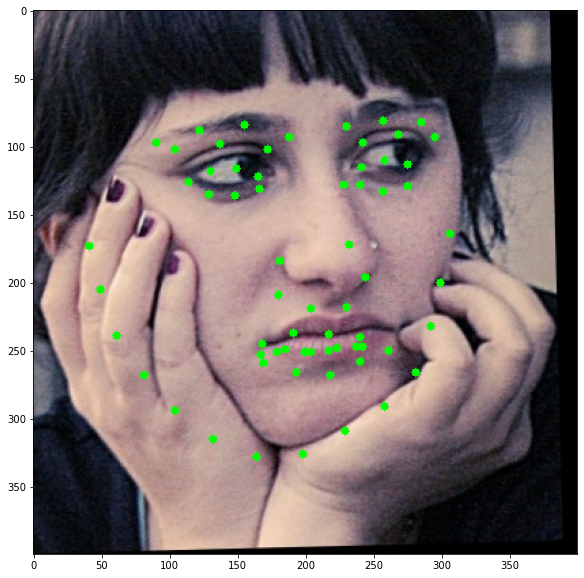

In [10]:
#apply the transformations to the images
# for i in range(len(landmarks_dataset)):
#     imgname = df.iloc[i]['images']
#     img = cv2.imread('datasets/croppedHelen/'+imgname)
#     img = apply_transformation(img, transformations[i])
#     cv2.imwrite('datasets/alignedHelen/'+imgname, img)

def apply_transformation(img, transformation):

    transform_matrix = np.zeros((3,3))
    transform_matrix[:2,:2] = transformation['rotation'] * transformation['scale']
    transform_matrix[:2,2] = transformation['translation']
    transform_matrix[2,2] = 1.0

    # Apply transformation
    rows, cols, _ = img.shape
    # angle_theta = np.degrees(np.arctan2(T[1,0], T[0,0])) #rotation angle
    # M = cv2.getRotationMatrix2D((cols/2,rows/2),angle_theta,b)
    img = cv2.warpAffine(img,transform_matrix[:2],(cols,rows))
    print(img.shape)
    img = cv2.resize(img, (400, 400))

    return img

imgname = df.iloc[0]['images']
img = cv2.imread('datasets/croppedHelen/'+imgname)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = apply_transformation(img, transformations[0])
cv2.imwrite('datasets/alignedHelen/'+imgname, img)


imgname = '2547802012_1.jpg'
landmarks= aligned_landmarks[0]
img = cv2.imread('datasets/alignedHelen/'+imgname)
for i in range(0,len(landmarks)):
  cv2.circle(img, (landmarks[i][0],landmarks[i][1]), 3, (0, 255, 0), -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show image with matplotlib and increase figure size
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()